In [1]:
pip install ete3

You should consider upgrading via the '/home/dan/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
from ete3 import Tree, PhyloTree, TreeStyle, NodeStyle, faces, AttrFace, ProfileFace, TextFace
from ete3 import NCBITaxa; ncbi = NCBITaxa()
#tree.render("%%inline") # line used to show inline vis

In [3]:
# Annotation of OTUs using NCBI
t = PhyloTree("curto.tree", format=1, sp_naming_function=None)

for node in t.traverse("postorder"):
    try:
        if node.is_leaf():
            taxid = node.name.split("__")[7]
            lineage = ncbi.get_lineage(int(taxid))
            names = ncbi.get_taxid_translator(lineage)
            OTUs = [names[id] for id in lineage] # se usa o lineage ao inves do rank_names keys para se manter a ordem das OTUs
            ranks = ncbi.get_rank(lineage)
            life_structure = {}
            for i in range(len(OTUs)):
                life_structure[ranks[lineage[i]]] = OTUs[i]                    
            for feature,value in life_structure.items():
                if feature != "no rank":
                    node.add_feature(feature,value)
    except:
        print("Error:", node)


In [4]:
# Function to be used in sp_naming_function 

#def get_species_name(node_name_string):
#     taxid = node_name_string.split("__")[7]
#     spcode = list(ncbi.get_taxid_translator([taxid]).values())[0]
#     return spcode

#t.set_species_naming_function(get_species_name)


In [5]:
#Getting midpoint outgroup for tree and rooting tree
midpoint_outgroup = t.get_midpoint_outgroup()
t.set_outgroup(midpoint_outgroup)

In [6]:
# Handling with double support values

for node in t.traverse("postorder"):
    if not node.is_leaf():
        try:
            node.support = float(node.name.split("/")[0]) # value of the support using fastbootstrap
            #node.support = float(node.name.split("/")[1])# value of the support using alrt
        except:
            print("no support value")
            

no support value
no support value


In [7]:
# Getting species name from the leaf names
for n in t.get_leaves():
    print ("node:", n.name.split("_")[0], "Species name:", n.species)

node: ADV84964.1 Species name: Terriglobus saanensis
node: BCI61147.1 Species name: Solibaculum mannosilyticum
node: ABF40689.1 Species name: Candidatus Koribacter versatilis
node: ABX02953.1 Species name: Herpetosiphon aurantiacus
node: AEF18218.1 Species name: Thermoanaerobacterium xylanolyticum
node: ACB50959.1 Species name: Crocosphaera subtropica
node: AFY39644.1 Species name: Leptolyngbya sp. PCC 7376
node: CAK28651.1 Species name: Synechococcus sp. RCC307
node: AFY96705.1 Species name: Chamaesiphon minutus
node: AFY80092.1 Species name: Oscillatoria acuminata
node: CBN56827.1 Species name: Kamptonema sp. PCC 6506
node: BAD78876.1 Species name: Synechococcus elongatus
node: AFY60612.1 Species name: Synechococcus sp. PCC 6312
node: BAC07746.1 Species name: Thermosynechococcus vestitus
node: BAC90401.1 Species name: Gloeobacter violaceus
node: CAV27494.1 Species name: Vibrio atlanticus
node: ABW02103.1 Species name: Caldivirga maquilingensis
node: AEA11562.1 Species name: Thermopro

In [8]:
# Tree description
t.describe()

Number of leaf nodes:	49
Total number of nodes:	97
Rooted:	Yes
Most distant node:	AEA11562.1_Status__Predicted__AssemblyAccession__GCA_000193375.1__CazyFamily__GH116__taxID__999630__name__Thermoproteus_uzoniensis_768-20__species__Thermoproteus_uzoniensis__Group__Archaea_
Max. distance:	4.514414


In [9]:
# Defining the species number
species = t.get_species()
print(len(species))

34


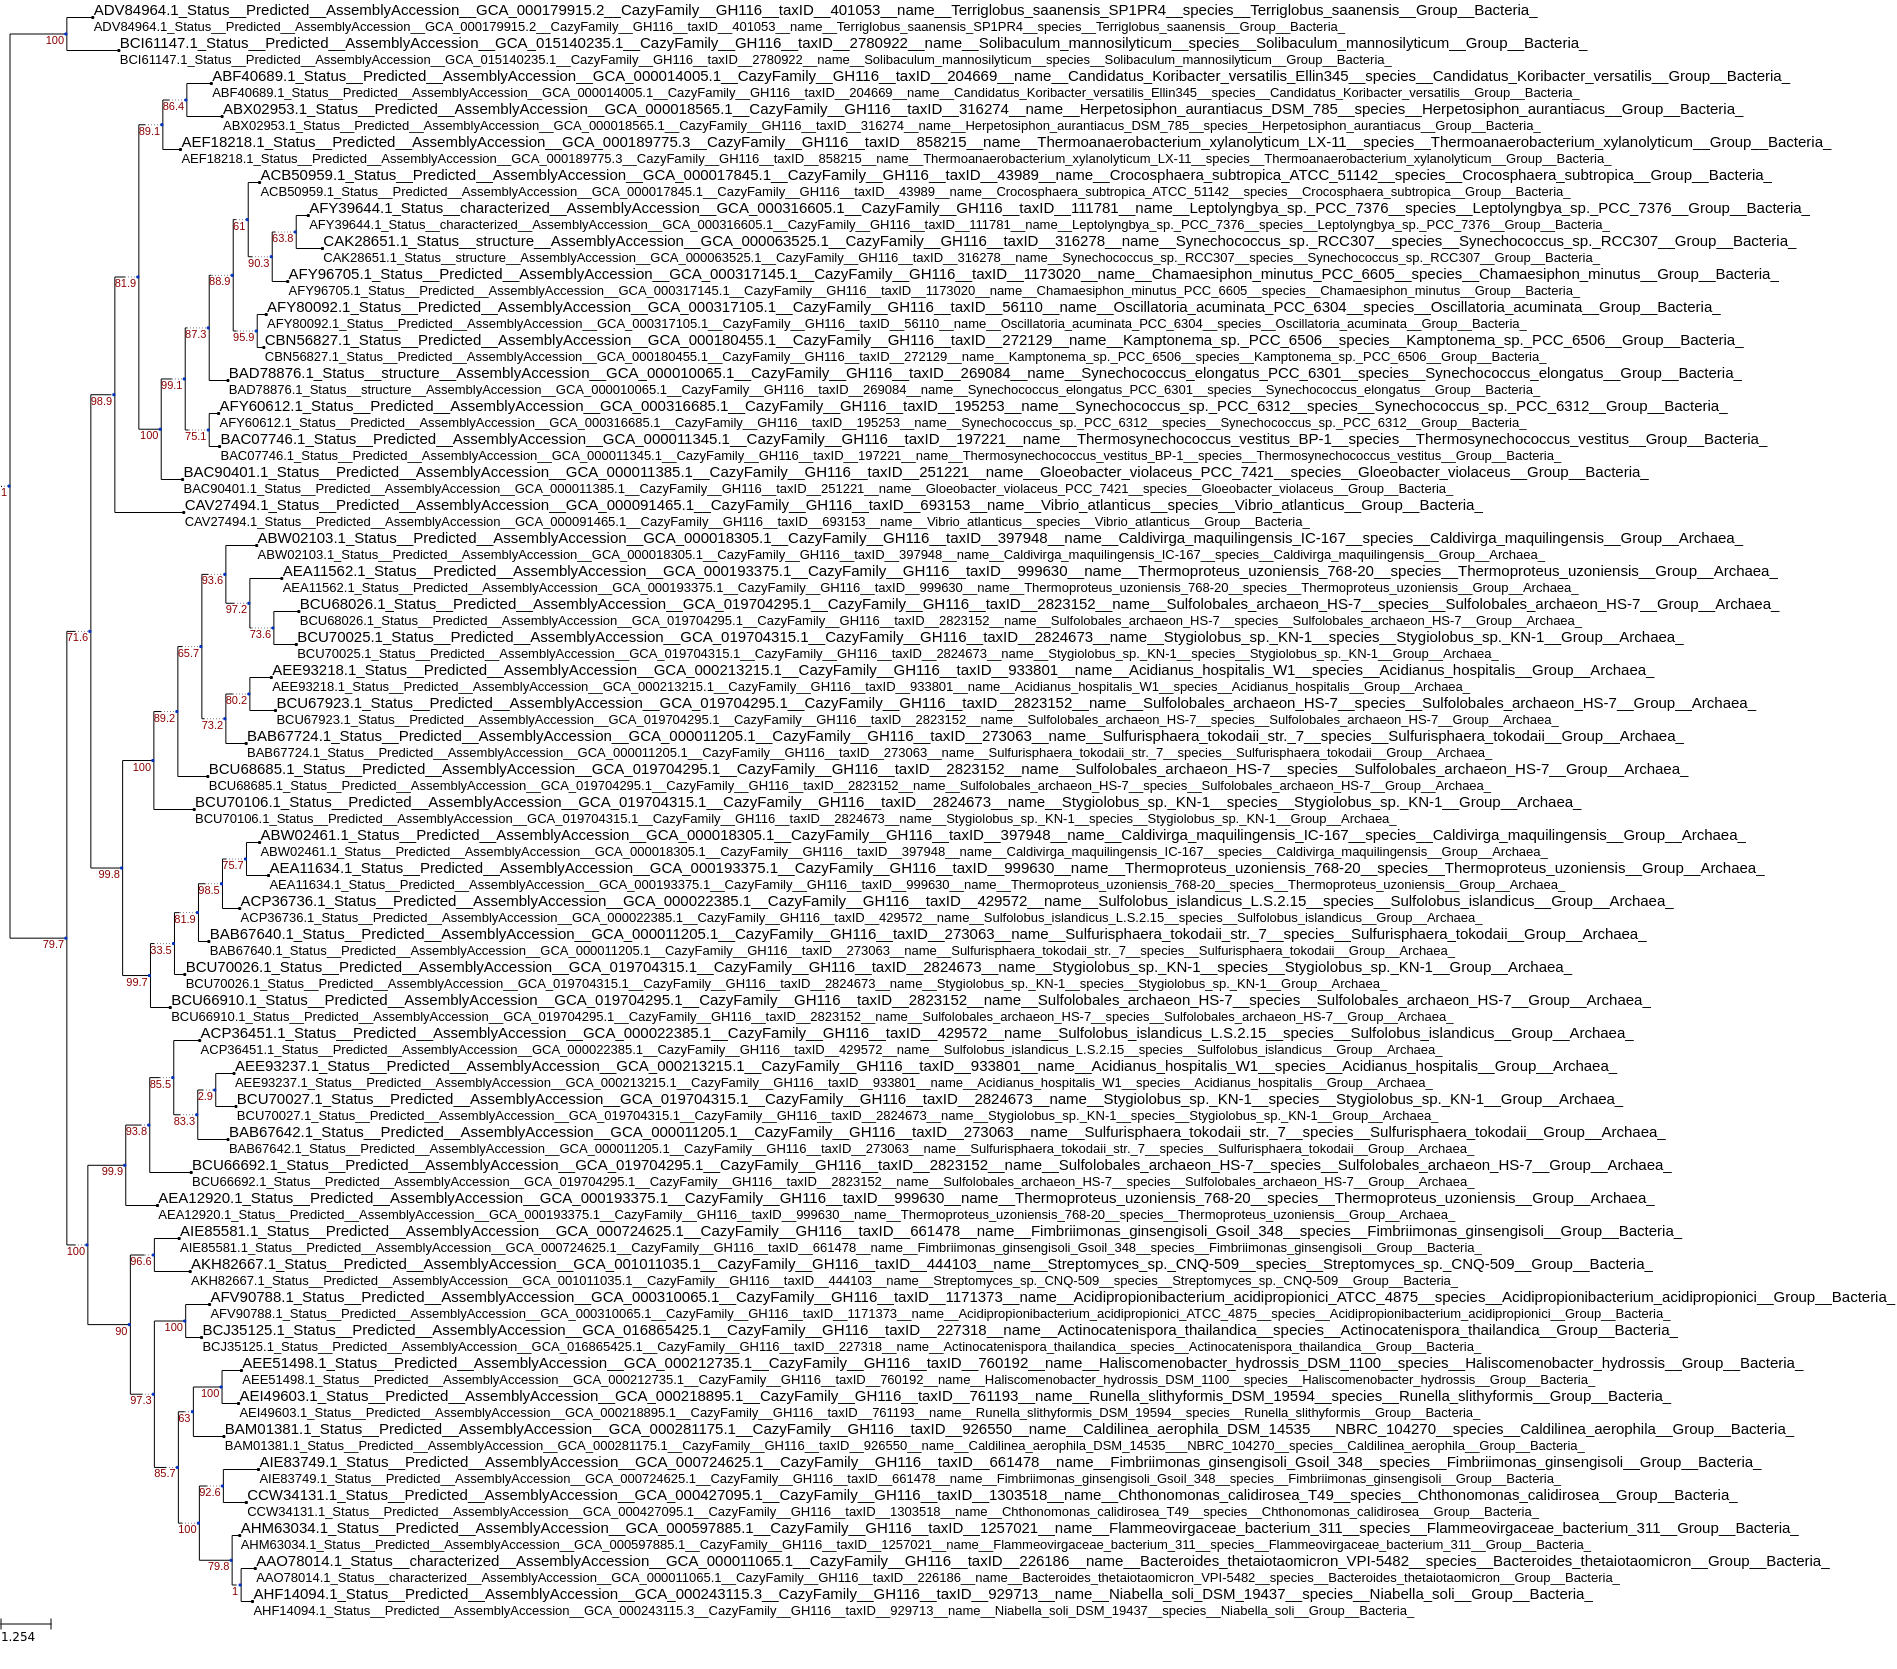

In [10]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_support = True

t.render("%%inline", tree_style=ts)